In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('earthquakes.csv')
covid = pd.read_csv('covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

<AxesSubplot:title={'center':'Rolling 20D Minimum Closing Price of Facebook Stock'}, xlabel='date'>

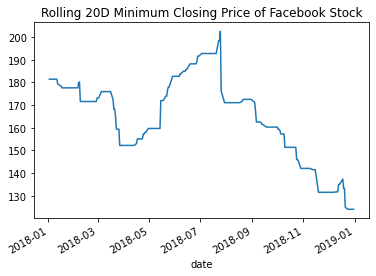

In [3]:
fb.close.rolling('20D').min().plot(
    title='Rolling 20D Minimum Closing Price of Facebook Stock'
)

<AxesSubplot:title={'center':"Facebook Stock Price's Daily Change from Open to Close"}, ylabel='Density'>

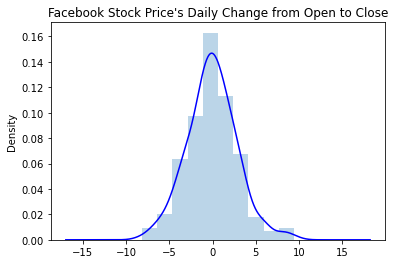

In [4]:
differential = fb.open - fb.close
ax = differential.plot(kind='hist', density=True, alpha=0.3)
differential.plot(
    kind='kde', color='blue', ax=ax, 
    title='Facebook Stock Price\'s Daily Change from Open to Close'
)

<AxesSubplot:title={'center':'Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock'}, xlabel='date'>

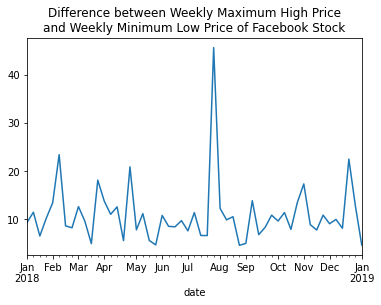

In [8]:
fb.resample('1W').agg(
    dict(high='max', low='min')
).assign(
    max_change_weekly=lambda x: x.high - x.low
).max_change_weekly.plot(
    title='Difference between Weekly Maximum High Price\n'
          'and Weekly Minimum Low Price of Facebook Stock'
)

<AxesSubplot:title={'center':'After hours trading monthly effect'}, xlabel='date'>

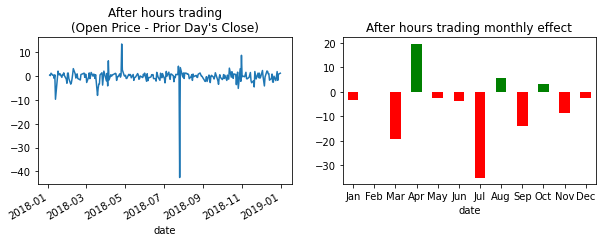

In [18]:
series = (fb.open - fb.close.shift())
monthly_effect = series.resample('1M').sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(
    ax=axes[0],
    title='After hours trading\n(Open Price - Prior Day\'s Close)'
)

monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(
    ax=axes[1],
    kind='bar', 
    title='After hours trading monthly effect',
    color=np.where(monthly_effect >= 0, 'g', 'r'),
    rot=0
)